Importing necessary modules

In [84]:
import numpy as pd 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn import datasets
import normalization
import support_file as sf
from sklearn.preprocessing import MinMaxScaler

Importing the data and making new dataframe data_num 

In [85]:
data = pd.read_csv("Ecommerce Customers.csv")
#print(data.head(15))

data_num = data[["Avg. Session Length","Time on App","Time on Website","Length of Membership","Yearly Amount Spent"]]

data_hot_clustering_help= sf.data_hot_clustering[["Avg. Session Length","Time on App","Time on Website","Length of Membership","State","Yearly Amount Spent"]]



Clustertendency

Scaling (Normalizing data_num) for tendency

In [90]:
scaler= MinMaxScaler()

data_num_norm_tend=scaler.fit_transform(data_num[["Avg. Session Length",
"Time on App","Time on Website","Length of Membership",
"Yearly Amount Spent"]])



In [87]:
#Hopkins statistcis is the result of a statistical test which tests on uniform distribution 
#the hopkins statistics expresses the tendency the dataset has to provide clusters 
#values which tend 0 show a relatively good cluster tendency because of a not uniform distribution 

from pyclustertend import hopkins
from sklearn.preprocessing import scale
X = scale(data_num_norm_tend)
hopkins(X,393)

0.22208049634277208

Run/open cluster algorithims for further processing

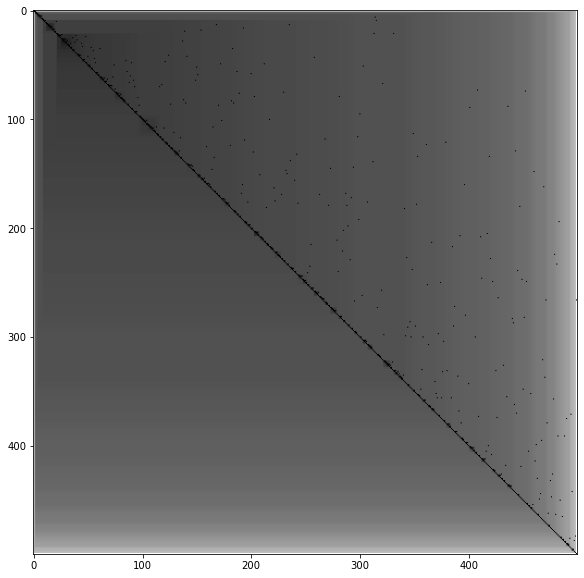

In [93]:
from sklearn import datasets
from pyclustertend import ivat
from sklearn.preprocessing import scale
X = scale(data_num_norm_tend)
ivat(X)  

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0            34.497268    12.655651        39.577668              4.082621   
1            31.926272    11.109461        37.268959              2.664034   
2            33.000915    11.330278        37.110597              4.104543   
3            34.305557    13.717514        36.721283              3.120179   
4            33.330673    12.795189        37.536653              4.446308   

   Yearly Amount Spent  
0           587.951054  
1           392.204933  
2           487.547505  
3           581.852344  
4           599.406092  


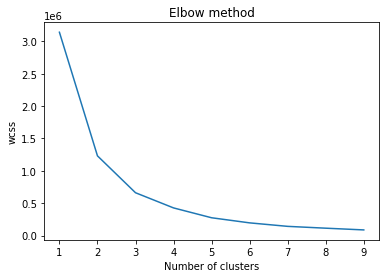

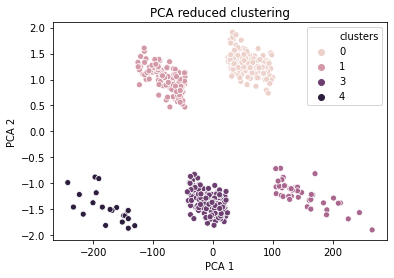

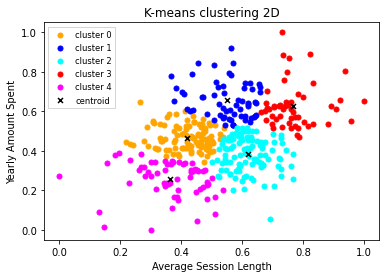

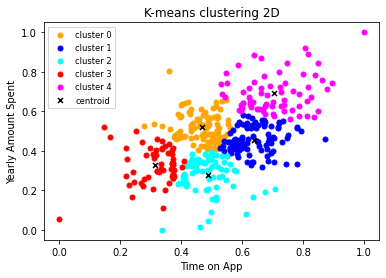

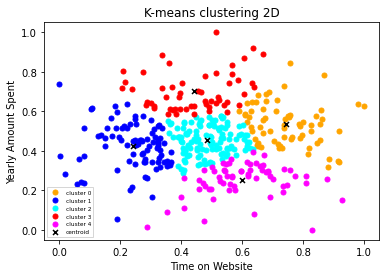

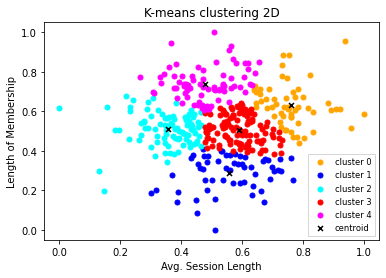

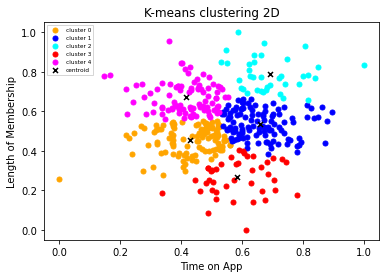

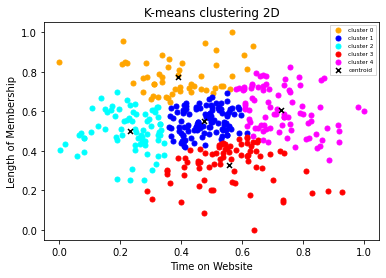

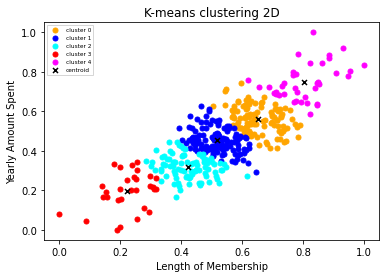

In [88]:
%run Kmeans.ipynb

   Avg. Session Length  Time on App  Time on Website  Length of Membership  \
0             1.414336     0.636547         2.582317              0.515500   
1            -1.118662    -0.952137         0.253594             -0.936044   
2             1.225459     1.727593        -0.298830             -0.469302   
3             0.797362    -0.009458        -2.562691              1.959165   
4            -1.024748    -0.688189        -0.336661              1.131892   

   Yearly Amount Spent  HIGH  MEDIUM  LOW  
0             1.105305     0       1    0  
1            -1.417115     0       0    1  
2             1.026716     0       0    1  
3             1.738679     1       0    0  
4             0.249935     0       1    0  


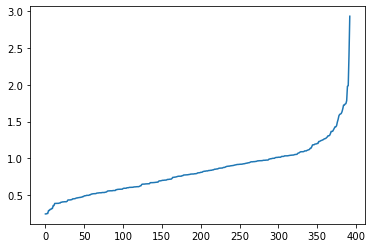

[-1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0

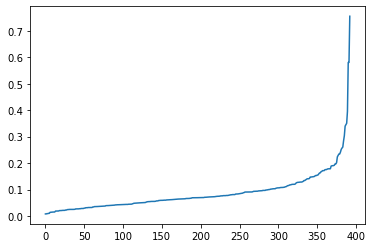

RuntimeError: This event loop is already running

In [89]:
%run DBSCAN.ipynb

Internal cluster validation 

In [12]:
#Silhouette coefficient on k means results  
#takes the idea of cohesion und separation into account 
#-1 = bad clustering, 0=overlapping clusters, 1=ideal homogenius clustering) 

metrics.silhouette_score(data_num, data_clustering["clusters"], metric='euclidean')


0.5430090601172435

In [33]:
#silhouette coefficient on DBSCAN results
metrics.silhouette_score(data_num, clusters, metric='euclidean')

ValueError: Found input variables with inconsistent numbers of samples: [500, 393]

In [12]:
#Calinski-Harabasz Index (variance ratio criterion) k means results 
#the higher the score the better the clusters are seperated from each other 
#probably only meaningful in direct relation to another algorithim 

metrics.calinski_harabasz_score(data_num, data_clustering["clusters"])

1287.3619054309438

In [16]:
#Calinski-Harabasz Index (variance ratio criterion) DBSCAN results

In [30]:
metrics.calinski_harabasz_score(data_num, clusters)

ValueError: Found input variables with inconsistent numbers of samples: [500, 393]

In [31]:
#Davies-Bouldin Index on k means results
#0=lowest score by having best possible seperation 
davies_bouldin_score(data_num, data_clustering["clusters"])

0.5250572125475805

In [32]:
#Davies-Bouldin Index on DBSCAN results 
davies_bouldin_score(data_num, clusters)

ValueError: Found input variables with inconsistent numbers of samples: [500, 393]